In [1]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rpkm_df = pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/RPKM_df.txt', sep='\t')
rpkm_df

,IGT_GSM5009231_DP005,IGT_GSM5009232_DP007,IGT_GSM5009233_DP008,IGT_GSM5009237_DP013,IGT_GSM5009241_DP025,IGT_GSM5009249_DP048,IGT_GSM5009251_DP051,IGT_GSM5009258_DP059,IGT_GSM5009260_DP063,IGT_GSM5009264_DP067,...,T3cD_GSM5009324_DP152,T3cD_GSM5009326_DP160,T3cD_GSM5009328_DP162,T3cD_GSM5009331_DP167,T3cD_GSM5009332_DP169,T3cD_GSM5009333_DP170,T3cD_GSM5009335_DP174,T3cD_GSM5009336_DP176,T3cD_GSM5009339_DP180,T3cD_GSM5009354_DP208
TSPAN6,2.572047,0.556519,2.090860,1.411700,0.753305,0.446371,1.667905,1.351397,1.749688,0.870331,...,1.211557,1.869703,2.149357,1.976858,3.697071,2.362481,1.054096,2.490579,1.441402,1.481881
TNMD,0.000000,0.000000,0.003178,0.024901,0.007095,0.000000,0.000000,0.006178,0.000000,0.000000,...,0.003357,0.000000,0.006286,0.000000,0.000000,0.000000,0.012750,0.024272,0.000000,0.000000
DPM1,1.614463,1.426811,1.745823,1.222486,1.323993,1.438254,1.549833,2.052846,1.704234,1.403180,...,1.889832,2.123138,1.409200,2.008660,1.778718,1.517967,2.092600,2.007387,2.111992,2.023557
SCYL3,0.422023,0.419257,0.303332,0.418172,0.245936,0.357997,0.313402,0.573169,0.355166,0.229590,...,0.243992,0.283353,0.262458,0.314671,0.377255,0.366135,0.318114,0.353033,0.360816,0.317665
FIRRM,0.016937,0.010123,0.010636,0.015504,0.015462,0.017222,0.016075,0.019235,0.010575,0.012554,...,0.014371,0.007273,0.011579,0.006514,0.024976,0.024531,0.009179,0.006477,0.013517,0.015440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUSC2P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
H2BK1,0.028537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LINC03094,0.211911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129357,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.435592,0.000000,0.000000
LOC112267968,0.001083,0.000000,0.002721,0.009138,0.000000,0.000000,0.001805,0.001323,0.000000,0.000000,...,0.000719,0.004325,0.000000,0.003468,0.000000,0.003039,0.005459,0.002969,0.000630,0.000000


In [3]:
rpkm_log2=np.log2(rpkm_df + 1)
rpkm_log2

,IGT_GSM5009231_DP005,IGT_GSM5009232_DP007,IGT_GSM5009233_DP008,IGT_GSM5009237_DP013,IGT_GSM5009241_DP025,IGT_GSM5009249_DP048,IGT_GSM5009251_DP051,IGT_GSM5009258_DP059,IGT_GSM5009260_DP063,IGT_GSM5009264_DP067,...,T3cD_GSM5009324_DP152,T3cD_GSM5009326_DP160,T3cD_GSM5009328_DP162,T3cD_GSM5009331_DP167,T3cD_GSM5009332_DP169,T3cD_GSM5009333_DP170,T3cD_GSM5009335_DP174,T3cD_GSM5009336_DP176,T3cD_GSM5009339_DP180,T3cD_GSM5009354_DP208
TSPAN6,1.836751,0.638323,1.628008,1.270050,0.810077,0.532438,1.415707,1.233518,1.459268,0.903293,...,1.145063,1.520902,1.655057,1.573790,2.231761,1.749526,1.038504,1.803466,1.287710,1.311434
TNMD,0.000000,0.000000,0.004578,0.035485,0.010200,0.000000,0.000000,0.008886,0.000000,0.000000,...,0.004835,0.000000,0.009041,0.000000,0.000000,0.000000,0.018278,0.034599,0.000000,0.000000
DPM1,1.386515,1.279062,1.457239,1.152175,1.216606,1.285848,1.350403,1.610155,1.435220,1.264945,...,1.530986,1.642996,1.268554,1.589121,1.474419,1.332259,1.628820,1.588510,1.637838,1.596247
SCYL3,0.507945,0.505136,0.382205,0.504033,0.317230,0.441480,0.393309,0.653674,0.438469,0.298177,...,0.314977,0.359919,0.336235,0.394702,0.461796,0.450100,0.398476,0.436197,0.444472,0.397984
FIRRM,0.024230,0.014531,0.015263,0.022196,0.022136,0.024634,0.023008,0.027486,0.015177,0.017999,...,0.020586,0.010455,0.016609,0.009367,0.035590,0.034964,0.013182,0.009314,0.019370,0.022105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUSC2P1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
H2BK1,0.040594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LINC03094,0.277284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175502,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.521646,0.000000,0.000000
LOC112267968,0.001562,0.000000,0.003921,0.013124,0.000000,0.000000,0.002601,0.001907,0.000000,0.000000,...,0.001036,0.006226,0.000000,0.004994,0.000000,0.004378,0.007854,0.004277,0.000909,0.000000


In [4]:
cv_per_gene = (rpkm_log2.std(axis=1) / rpkm_log2.mean(axis=1)) * 100
cv_per_gene


TSPAN6           30.081855
TNMD            247.092813
DPM1             16.979797
SCYL3            20.565761
FIRRM            45.864544
                   ...    
TUSC2P1                NaN
H2BK1           812.492902
LINC03094       309.405253
LOC112267968    187.395482
LOC128706666           NaN
Length: 35836, dtype: float64

In [5]:
top_500_genes = cv_per_gene.nlargest(500)
top_500_genes

RN7SL601P     1153.256259
FLVCR2-AS1    1153.256259
MIR548F4      1153.256259
RN7SL843P     1153.256259
OR4F14P       1153.256259
                 ...     
RN7SL719P     1153.256259
MRPS31P1      1153.256259
MIR6881       1153.256259
MIR6072       1153.256259
MIR24-2       1153.256259
Length: 500, dtype: float64

In [6]:
datos_top_500_genes = rpkm_log2.loc[top_500_genes.index]
datos_top_500_genes

,IGT_GSM5009231_DP005,IGT_GSM5009232_DP007,IGT_GSM5009233_DP008,IGT_GSM5009237_DP013,IGT_GSM5009241_DP025,IGT_GSM5009249_DP048,IGT_GSM5009251_DP051,IGT_GSM5009258_DP059,IGT_GSM5009260_DP063,IGT_GSM5009264_DP067,...,T3cD_GSM5009324_DP152,T3cD_GSM5009326_DP160,T3cD_GSM5009328_DP162,T3cD_GSM5009331_DP167,T3cD_GSM5009332_DP169,T3cD_GSM5009333_DP170,T3cD_GSM5009335_DP174,T3cD_GSM5009336_DP176,T3cD_GSM5009339_DP180,T3cD_GSM5009354_DP208
RN7SL601P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.023062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FLVCR2-AS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MIR548F4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.530114,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RN7SL843P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.267423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F14P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.089860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RN7SL719P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MRPS31P1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MIR6881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MIR6072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import pandas as pd

ta= datos_top_500_genes.T
ta
ta['conditions'] = ta.index.map(lambda x: 'ND' if 'ND' in x else 'IGT' if 'IGT' in x else 'T2D' if 'T2D' in x else 'T3cD')
# Establecer 'conditions' como índice
ta.set_index('conditions', inplace=True)
ta.index.name = None

# Añadir la columna "patologia" basada en el índice
ta['patologia'] = ta.index.map(lambda x: 'ND' if 'ND' in x else 'IGT' if 'IGT' in x else 'T2D' if 'T2D' in x else 'T3cD')

# Mover el índice a una nueva columna
ta.reset_index(inplace=True)

# Cambiar el nombre de la nueva columna a 'patologia' y eliminar la columna anterior
ta = ta.rename(columns={'index': 'patologia'}).iloc[:, :-1]

ta

,patologia,RN7SL601P,FLVCR2-AS1,MIR548F4,RN7SL843P,OR4F14P,OR4A18P,IGHV3-54,RNU6-461P,RN7SKP267,...,LOC104613533,C1QL1P1,MIR4704,RN7SL560P,MIR4475,RN7SL719P,MRPS31P1,MIR6881,MIR6072,MIR24-2
0,IGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777115,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,T3cD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,T3cD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,T3cD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,T3cD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


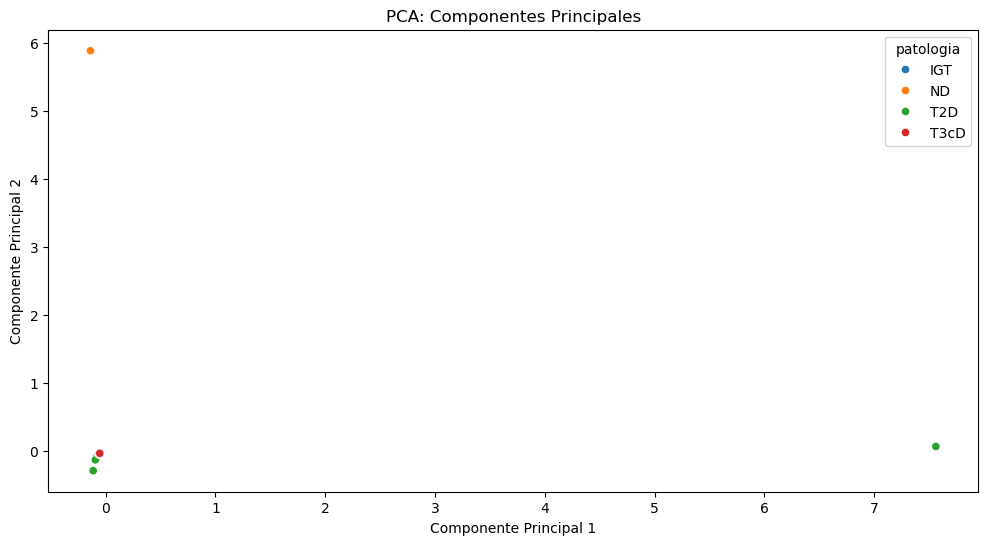

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = ta.iloc[:, 1:35002].values  
y = ta.loc[:, ["patologia"]].values

pca = PCA(n_components=2)
components = pca.fit_transform(x)

# Crear DataFrame para los componentes principales
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Concatenar con la columna y
pcaDF = pd.concat([pca_df, pd.DataFrame(y, columns=["patologia"])], axis=1)


# Graficar los resultados
plt.figure(figsize=(12, 6))
scatter=sns.scatterplot(data=pcaDF, x='PC1', y='PC2', hue="patologia")



plt.title('PCA: Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

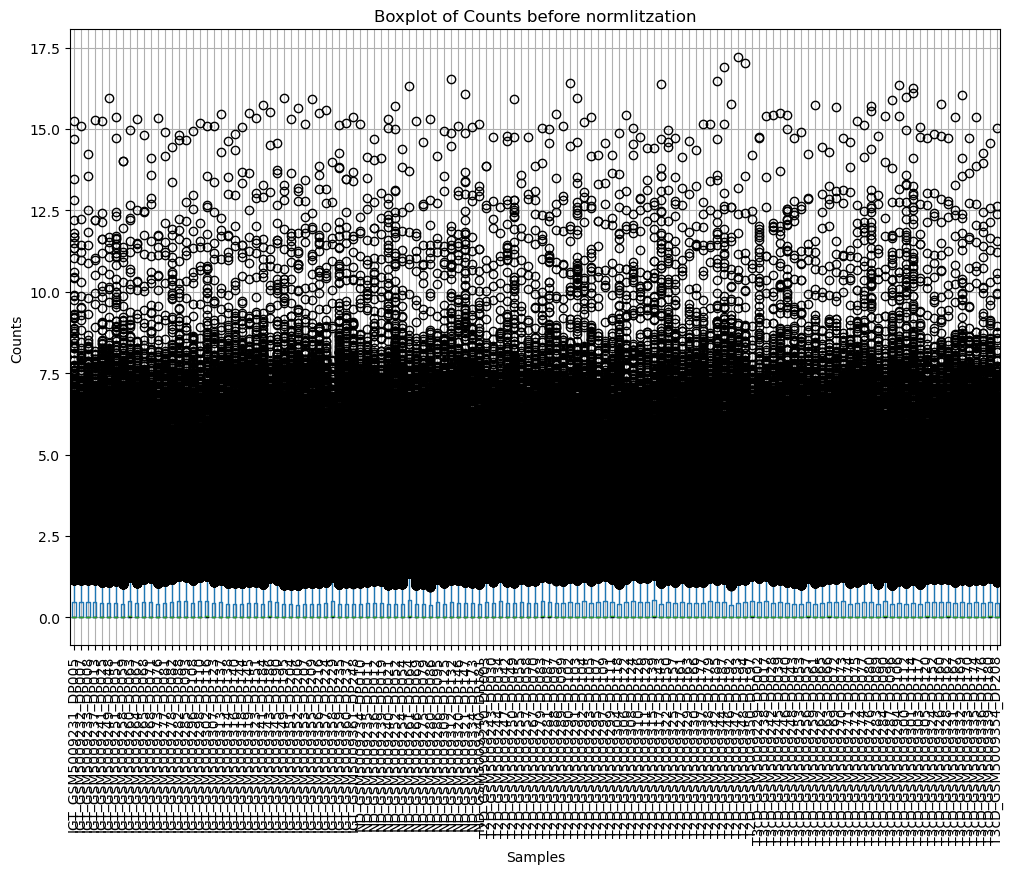

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

rpkm_log2.boxplot()
plt.title('Boxplot of Counts before normlitzation')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()